In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
pwd

'/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation'

In [3]:
grayImg = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation/images/albert-einstein-gray.jpg', cv2.IMREAD_GRAYSCALE)
colorImg = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation/images/tulips.jpg', cv2.IMREAD_GRAYSCALE)
affineWarped = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation/images/albert-einstein-Affine-warped.jpg', cv2.IMREAD_GRAYSCALE)
projectiveWarped = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation/images/albert-einstein-Projective-warped.jpg', cv2.IMREAD_GRAYSCALE)

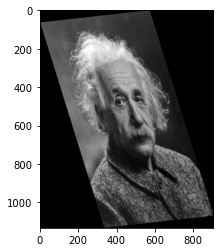

In [4]:
plt.imshow(affineWarped, cmap='gray')

In [5]:
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    h, w = I.shape
    figSize = w/float(dpi), h/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(I, cmap='gray')
    plt.show

In [6]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [7]:
def f_bilinearInterpolate(r, c, I):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]: # check interpolation pt is in the image
        a = wl * I[tr, lc] + wr * I[tr, rc]
        b = wl * I[br, lc] + wr * I[br, rc]
        g = a * wb + b * wt
        return np.uint8(g)
    else:
        return 0

In [8]:
def f_getExtentsProjective(T,rMax,cMax):
    Cords = np.array([[0,0,1],[0,cMax-1,1],[rMax-1,0,1],[rMax-1,cMax-1,1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [9]:
def f_transformProjective(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsProjective(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j, 1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
            i , j = P[0] , P[1]
            if i < 0 or i>=rMax or j<0 or j>=cMax:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [10]:
def f_getPoints(I, numPts):
    %matplotlib
    fig, ax = plt.subplots(1, figsize=(15, 30))
    plt.imshow(I, cmap='gray')
    pts = np.round(np.array(plt.ginput(n=numPts)))
    pts = pts[:, [1, 0]].T
    plt.close()
    return pts

In [39]:
pts = f_getPoints(grayImg, 4)

Using matplotlib backend: QtAgg


In [40]:
pts

array([[399., 404., 484., 637.],
       [320., 507., 437., 426.]])

### Affine Transformation Verification with Python

In [41]:
P = f_getPoints(grayImg, 3)

Using matplotlib backend: QtAgg


In [42]:
P

array([[408., 401., 486.],
       [322., 509., 443.]])

In [43]:
P_dash = f_getPoints(affineWarped, 3)

Using matplotlib backend: QtAgg


In [44]:
P_dash

array([[487., 476., 578.],
       [387., 538., 520.]])

In [45]:
P = np.vstack((P, np.ones((1, 3))))

In [46]:
P

array([[408., 401., 486.],
       [322., 509., 443.],
       [  1.,   1.,   1.]])

In [47]:
P_dash = np.vstack((P_dash, np.ones((1, 3))))

In [48]:
P_dash

array([[487., 476., 578.],
       [387., 538., 520.],
       [  1.,   1.,   1.]])

In [49]:
np.linalg.det(P)

-15432.999999999989

In [50]:
A = P_dash.dot(np.linalg.inv(P))

In [51]:
A

array([[ 1.18888097e+00, -1.43199637e-02,  6.54759282e+00],
       [ 4.27655025e-01,  8.23495108e-01, -5.26486749e+01],
       [ 1.73472348e-18,  1.08420217e-19,  1.00000000e+00]])

In [60]:
I2 = f_transformProjective(A, grayImg)

In [61]:
plt.imshow(I2, cmap='gray')

virtual void QEventDispatcherUNIX::registerSocketNotifier(QSocketNotifier*): Multiple socket notifiers for same socket 11 and type Read


In [62]:
plt.imshow(affineWarped, cmap='gray')

virtual void QEventDispatcherUNIX::registerSocketNotifier(QSocketNotifier*): Multiple socket notifiers for same socket 11 and type Read


### Affine Transformation with more than 3 points

In [74]:
P = f_getPoints(grayImg, 5)

Using matplotlib backend: QtAgg


In [75]:
P_dash = f_getPoints(affineWarped, 5)

Using matplotlib backend: QtAgg


In [76]:
P = np.vstack((P, np.ones((1, 5))))

In [77]:
P_dash = np.vstack((P_dash, np.ones((1, 5))))

In [78]:
A = P_dash.dot(P.T).dot(np.linalg.inv(P.dot(P.T)))

In [79]:
A

array([[ 1.07892781e+00, -8.49433110e-02,  8.61147590e+01],
       [ 3.55304466e-01,  8.13254251e-01, -2.37852382e+01],
       [ 6.93889390e-18,  6.93889390e-18,  1.00000000e+00]])

In [80]:
I3 = f_transformProjective(A, grayImg)

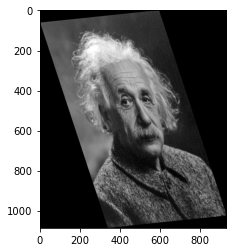

In [82]:
%matplotlib inline
plt.imshow(I3, cmap='gray')

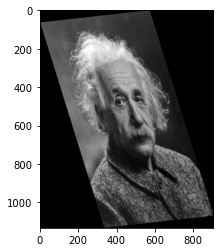

In [83]:
plt.imshow(affineWarped, cmap='gray')

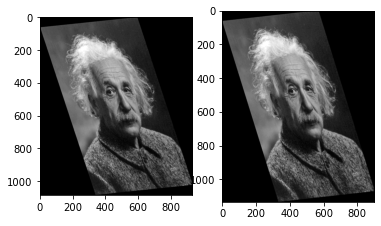

In [84]:
plt.figure(1)
plt.subplot(121)
plt.imshow(I3, cmap='gray')
plt.subplot(122)
plt.imshow(affineWarped, cmap='gray')
plt.show()

### Quiz
Can you copy Affine transformation/warp from one image and transform another image accordingly?

In [85]:
P = f_getPoints(grayImg, 3)

Using matplotlib backend: QtAgg


In [86]:
P

array([[257., 348., 633.],
       [407., 499., 426.]])

In [87]:
P_dash = f_getPoints(affineWarped, 3)

Using matplotlib backend: QtAgg


In [88]:
P_dash

array([[325., 415., 740.],
       [414., 511., 558.]])

In [89]:
P = np.vstack((P, np.ones((1, 3))))

In [90]:
P

array([[257., 348., 633.],
       [407., 499., 426.],
       [  1.,   1.,   1.]])

In [91]:
P_dash = np.vstack((P_dash, np.ones((1, 3))))

In [92]:
np.linalg.det(P)

-32862.999999999985

In [93]:
A = P_dash.dot(np.linalg.inv(P))

In [94]:
A

array([[ 1.10975870e+00, -1.19435231e-01,  8.84021544e+01],
       [ 3.47046831e-01,  7.11073243e-01,  3.54021544e+01],
       [ 8.67361738e-19,  1.73472348e-18,  1.00000000e+00]])

In [96]:
test_img = cv2.imread('/home/thura/Desktop/computer-vision-and-DL/CV-course1/4 - Geometric Transormation Estimation/images/cm.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(test_img, cmap='gray')

virtual void QEventDispatcherUNIX::registerSocketNotifier(QSocketNotifier*): Multiple socket notifiers for same socket 11 and type Read


In [97]:
I4 = f_transformProjective(A, test_img)

In [98]:
plt.imshow(I4, cmap='gray')

virtual void QEventDispatcherUNIX::registerSocketNotifier(QSocketNotifier*): Multiple socket notifiers for same socket 11 and type Read


### Projective Transformation Estimation

In [19]:
%matplotlib inline

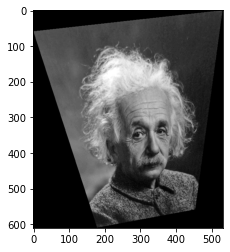

In [20]:
plt.imshow(projectiveWarped, cmap='gray')

In [13]:
P = f_getPoints(grayImg, 3)

Using matplotlib backend: QtAgg


In [14]:
P_dash = f_getPoints(projectiveWarped, 3)

Using matplotlib backend: QtAgg


In [15]:
P = np.vstack((P, np.ones((1, 3))))
P_dash = np.vstack((P_dash, np.ones((1, 3))))

In [16]:
H = P_dash.dot(np.linalg.inv(P))

In [17]:
I5 = f_transformProjective(H, grayImg)

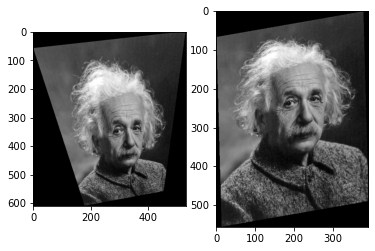

In [22]:
plt.subplot(121)
plt.imshow(projectiveWarped, cmap='gray')
plt.subplot(122)
plt.imshow(I5, cmap='gray')
plt.show()

In [23]:
H

array([[ 5.15151515e-01, -9.09090909e-02,  1.81363636e+02],
       [ 1.40041189e-02,  5.17917034e-01,  1.05714740e+02],
       [ 0.00000000e+00, -8.40256684e-19,  1.00000000e+00]])

To Fix the above situation
We use Null space implementation of Projective Transformation Estimation with Direct Linear Transformation....

In [24]:
def f_computeRightNullSpace(A):
    B = A.T.dot(A)
    w, v = np.linalg.eig(B)
    idx = np.argmin(w)
    null_vector = v[:, idx]
    return null_vector


In [25]:
A = np.random.rand(3, 4)

In [28]:
A

array([[0.06392704, 0.14032135, 0.78966179, 0.22798939],
       [0.09907623, 0.22258259, 0.54562761, 0.03341727],
       [0.56656886, 0.24848145, 0.1875976 , 0.6936139 ]])

In [26]:
nv = f_computeRightNullSpace(A)

In [27]:
nv

array([ 0.66161798, -0.64004242,  0.16271146, -0.35515113])

In [29]:
A.dot(nv)

array([ 1.94289029e-16, -4.16333634e-16,  2.49800181e-16])

### Direct Linear Transformation Implementation

In [84]:
def f_computeRightNullSpace(A):
    B = A.T.dot(A)
    w,v = np.linalg.eig(B)
    idx = np.argmin(w)
    null_Vector = v[:, idx]
    return null_Vector

In [86]:
P = f_getPoints(grayImg, 6)

Using matplotlib backend: QtAgg


In [88]:
P_dash = f_getPoints(projectiveWarped, 6)

Using matplotlib backend: QtAgg


In [89]:
P = np.vstack((P, np.ones((1, 6))))
P_dash = np.vstack((P_dash, np.ones((1, 6))))

In [90]:
A = np.zeros((12, 9))

In [99]:
A[::2,:3] = -P.T
A[1::2,3:6] = -P.T
A[::2,6:] = P.dot(np.diag(P_dash[0,:])).T
A[1::2,6:] = P.dot(np.diag(P_dash[1,:])).T

In [100]:
A

array([[-6.00000e+00, -6.00000e+00, -1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  3.72000e+02,  3.72000e+02,
         6.20000e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -6.00000e+00,
        -6.00000e+00, -1.00000e+00,  3.00000e+01,  3.00000e+01,
         5.00000e+00],
       [-7.00000e+00, -7.26000e+02, -1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  3.50000e+01,  3.63000e+03,
         5.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -7.00000e+00,
        -7.26000e+02, -1.00000e+00,  3.68200e+03,  3.81876e+05,
         5.26000e+02],
       [-9.43000e+02, -7.24000e+02, -1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  5.22422e+05,  4.01096e+05,
         5.54000e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -9.43000e+02,
        -7.24000e+02, -1.00000e+00,  4.26236e+05,  3.27248e+05,
         4.52000e+02],
       [-9.45000e+02, -4.00000e+00, -1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000

In [101]:
h = f_computeRightNullSpace(A)

In [102]:
h

array([-1.99471679e-02,  1.41004868e-03, -9.95937096e-01, -6.37305064e-03,
       -1.28773979e-02,  8.50137439e-02, -1.72935446e-05, -1.26390241e-06,
       -1.66024727e-02])

In [103]:
H = np.reshape(h, (3, 3))

In [104]:
H

array([[-1.99471679e-02,  1.41004868e-03, -9.95937096e-01],
       [-6.37305064e-03, -1.28773979e-02,  8.50137439e-02],
       [-1.72935446e-05, -1.26390241e-06, -1.66024727e-02]])

In [105]:
I6 = f_transformProjective(H, grayImg)

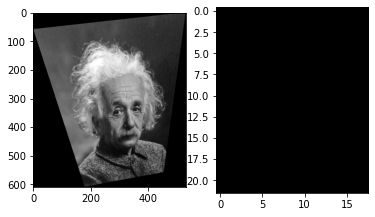

In [106]:
%matplotlib inline
plt.subplot(121)
plt.imshow(projectiveWarped, cmap='gray')
plt.subplot(122)
plt.imshow(I6, cmap='gray')
plt.show()

In [107]:
P = f_getPoints(grayImg,6)

Using matplotlib backend: QtAgg


In [108]:
P_dash = f_getPoints(projectiveWarped,6)

Using matplotlib backend: QtAgg


In [109]:
P = np.vstack((P,np.ones((1,6))))
P_dash = np.vstack((P_dash,np.ones((1,6))))

In [110]:
A = np.zeros((12,9))

In [111]:
A[::2,:3] = -P.T
A[1::2,3:6] = -P.T
A[::2,6:] = P.dot(np.diag(P_dash[0,:])).T
A[1::2,6:] = P.dot(np.diag(P_dash[1,:])).T

In [112]:
h = f_computeRightNullSpace(A)

In [113]:
H = np.reshape(h,(3,3))

In [118]:
def f_transformProjective(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = f_getExtentsProjective(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j,1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
            i , j = P[0] , P[1]
            if i < 0 or i>=rMax or j<0 or j>=cMax:
                pass
            else:
                g = f_bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2

In [119]:
I2=f_transformProjective(H,grayImg)

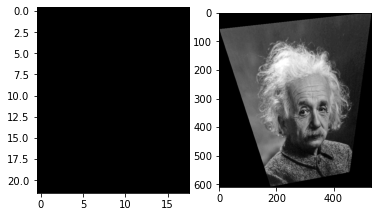

In [120]:
%matplotlib inline
plt.subplot(121)
plt.imshow(I2,cmap='gray')
plt.subplot(122)
plt.imshow(projectiveWarped,cmap='gray')
plt.show()